In [1]:
import os
training_folder_name = '../data/faces/training'
img_size = (128,128)
classes = sorted(os.listdir(training_folder_name))
print(classes)

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54

In [2]:
!pip install --upgrade keras
import sys
import keras
print('Keras version:',keras.__version__)

from keras import backend as K

Requirement already up-to-date: keras in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (2.3.1)


Using TensorFlow backend.


Keras version: 2.3.1


In [3]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 30
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


Getting Data...
Preparing training dataset...
Found 2000 images belonging to 200 classes.
Preparing validation dataset...
Found 800 images belonging to 200 classes.


In [4]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras import optimizers

# Define the model as a sequence of layers
model = Sequential()
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))
opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 123, 123, 32)      3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               5017800   
Total params: 5,058,184
Trainable params: 5,058,184
Non-trainable params: 0
____________________________________________

In [5]:
# Train the model over 10 epochs
num_epochs = 10
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/10
66/66 [==============================] - 1192s 18s/step - loss: 4.0000 - accuracy: 0.2325 - val_loss: 2.4390 - val_accuracy: 0.4436
Epoch 2/10
66/66 [==============================] - 1129s 17s/step - loss: 0.3847 - accuracy: 0.9081 - val_loss: 1.7555 - val_accuracy: 0.5753
Epoch 3/10
66/66 [==============================] - 1134s 17s/step - loss: 0.1174 - accuracy: 0.9756 - val_loss: 2.3093 - val_accuracy: 0.6364
Epoch 4/10
66/66 [==============================] - 1102s 17s/step - loss: 0.0523 - accuracy: 0.9904 - val_loss: 2.8085 - val_accuracy: 0.6169
Epoch 5/10
66/66 [==============================] - 1055s 16s/step - loss: 0.0496 - accuracy: 0.9898 - val_loss: 2.8156 - val_accuracy: 0.6325
Epoch 6/10
66/66 [==============================] - 1126s 17s/step - loss: 0.0416 - accuracy: 0.9894 - val_loss: 1.7557 - val_accuracy: 0.6221
Epoch 7/10
66/66 [==============================] - 1184s 18s/step - loss: 0.0530 - accuracy: 0.9883 - val_loss: 3.0994 - val_accuracy: 0.6351

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


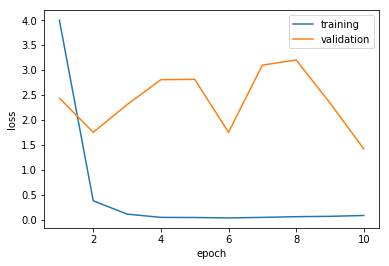

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()